In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Open the raw data

In [3]:
height_map_values = open('height_map_data.txt').read()

In [11]:
each_point_height_values = height_map_values.split('\n7\n')

In [27]:
height_map = [[float(x.split(',')[1][4:]) for x in point.split('\n') if len(x)> 3] for point in each_point_height_values]
height_map = np.array(height_map)

In [30]:
useful_values_height_map = height_map[:, 2:]

This is the height at each point

In [38]:
average_height_at_each_point = np.average(useful_values_height_map, 1)

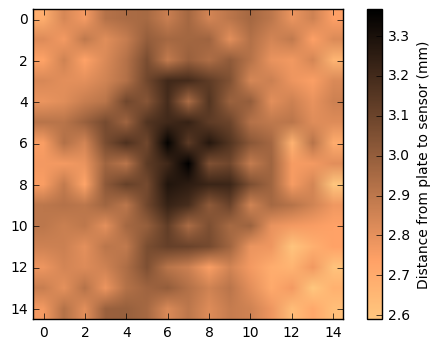

In [51]:
plt.imshow(
    average_height_at_each_point.reshape(15,15)/95.6/7.4+12.5/7.4,
    cmap='copper_r')
plt.colorbar(label='Distance from plate to sensor (mm)')